<a href="https://colab.research.google.com/github/Difesoares/Projeto_analise_dados_PRF_Radar/blob/main/An%C3%A1lise_dos_Acidentes_em_Rodovias_e_Posicionamento_de_Radares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Análise dos Acidentes em Rodovias e Posicionamento de Radares**

**Fonte PRF:** [Dados abertos da PRF](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf)

**Fonte Radares:** [Dados Radares](https://dados.gov.br/dados/conjuntos-dados/radar)

## **1 - Entendimento do problema**

Utilizando os dados do governo, quero entender como os radares afetam a segurança e o tráfego nas estradas. A ideia é saber onde acontecem mais acidentes e onde estão os radares e descobrir se essa relação deixa o trânsito mais seguro.

A intenção é sugerir maneiras de tornar nossas estradas mais seguras e eficientes. Dessa forma, algumas questões de negócio são destacadas para direcionar a análise.

**1. Identificação de Pontos Críticos:** Identificar os locais onde ocorrem mais acidentes e avaliar se radares estão presentes nesses pontos. Isso pode ajudar a determinar se os radares estão posicionados nos lugares certos.

**2. Correlação entre Radares e Acidentes:** Realizar uma análise estatística para identificar se há uma correlação significativa entre a presença de radares em determinadas áreas e a redução da frequência de acidentes.

**3. Análise temporal dos anos relacionados:** Compreender se teve um aumento ou diminuição do número de acidentes e mortes nas rodovias entre os anos de 2021, 2022 até Julho de 2023.


## **2 - Entendimento dos Dados**

### **2.1 - Dados Acidentes Rodovias PRF**

**2.1.1 - Sobre os dados da PRF**

Os dados de acidentes de trânsito utilizados neste estudo foram coletados da base pública da [Polícia Rodoviária Federal](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf) (PRF) e abrangem o período de janeiro de 2021 a julho de 2023. Essa base oficial e de acesso público contém registros abrangentes de acidentes ocorridos nas rodovias de todo o Brasil durante esse intervalo.

**2.1.2 - Dicionário dos dados**

**id:** Variável com valores numéricos, representando o identificador do acidente.

**data_inversa:** Data da ocorrência no formato dd/mm/aaaa

**dia_semana:** Dia da semana da ocorrência. Ex.: Segunda, Terça, etc.

**horário:** Horário da ocorrência no formato hh:mm:ss.

**uf:** Unidade da Federação. Ex.: MG, PE, DF, etc.

**br:** Variável com valores numéricos, representando o identificador da BR do acidente.

**km:** Identificação do quilômetro onde ocorreu o acidente, com valor mínimo de 0,1 km e com a casa decimal separada por ponto.

**municipio:** Nome do município de ocorrência do acidente.

**causa_acidente:** Identificação da causa principal do acidente. Neste conjunto de dados são excluídos os acidentes com a variável causa principal igual a “Não”.

**tipo_acidente:** Identificação do tipo de acidente. Ex.: Colisão frontal, Saída de pista, etc. Neste conjunto de dados são excluídos os tipos de acidentes com ordem maior ou igual a dois. A ordem do acidente demonstra a sequência cronológica dos tipos presentes na mesma ocorrência.

**classificação_acidente:** Classificação quanto à gravidade do acidente: Sem Vítimas, Com Vítimas Feridas, Com Vítimas Fatais e Ignorado.

**fase_dia:** Fase do dia no momento do acidente. Ex. Amanhecer, Pleno dia, etc.

**sentido_via:** Sentido da via considerando o ponto de colisão: Crescente e decrescente.

**condição_meteorologica:** Condição meteorológica no momento do acidente: Céu claro, chuva, vento, etc.

**tipo_pista:** Tipo da pista considerando a quantidade de faixas: Dupla, simples ou múltipla.

**tracado_via:** Descrição do traçado da via.

**uso_solo:** Descrição sobre as características do local do acidente: Urbano=Sim;Rural=Não.

**pessoas:** Total de pessoas envolvidas na ocorrência.

**mortos:** Total de pessoas mortas envolvidas na ocorrência.

**feridos_leves:** Total de pessoas com ferimentos leves envolvidas na ocorrência.

**feridos_graves:** Total de pessoas com ferimentos graves envolvidas na ocorrência.

**ilesos:** Total de pessoas ilesas envolvidas na ocorrência.

**ignorados:** Total de pessoas envolvidas na ocorrência e que não se soube o estado físico.

**feridos:** Total de pessoas feridas envolvidas na ocorrência (é a soma dos feridos leves com os graves).

**veiculos:** Total de veículos envolvidos na ocorrência.

**latitude:** Latitude do local do acidente em formato geodésico decimal.

**longitude:** Longitude do local do acidente em formato geodésico decimal.

**regional:** Superintendência regional da PRF cujo acidente ocorreu dentro dos limites de sua circunscrição. Atenção nem sempre a UF da regional coincide com a UF do acidente. Ex: A circunscrição da SPRF-DF grande parte está localizada na UF “GO”.

**delegacia:** delegacia da PRF cujo acidente ocorreu dentro dos limites de sua circunscrição.

**uop:** UOP= unidade operacional. Unidade operacional da PRF cujo acidente ocorreu dentro dos limites de sua circunscrição.

In [ ]:
# importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**2.1.3 - Visualização da Base de Dados**

In [ ]:
# importar os dados da PRF
df_prf21 = pd.read_csv ("/content/drive/MyDrive/POD Academy/Projeto PRF/datatran2021.csv", delimiter= ';', encoding = 'ISO-8859-1')
df_prf22 = pd.read_csv ("/content/drive/MyDrive/POD Academy/Projeto PRF/datatran2022.csv", delimiter= ';', encoding = 'ISO-8859-1')
df_prf23 = pd.read_csv ("/content/drive/MyDrive/POD Academy/Projeto PRF/Dados_PRF_2023.csv", delimiter= ';', encoding = 'ISO-8859-1')

In [ ]:
# concatenando os 3 datasets
df_concat = pd.concat ([df_prf21, df_prf22, df_prf23], axis=0)

In [ ]:
# Visualizando o número de linhas e colunas
df_concat.shape

(161614, 30)

In [ ]:
# Visualizar 5 primeiras linhas
df_concat.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116.0,453,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,0,1,1,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174.0,937,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,5,1,1,5,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,Tombamento,...,0,0,11,2,12,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493.0,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,0,1,1,1,3,"-22,6687122","-43,01862696",SPRF-RJ,DEL04-RJ,UOP02-DEL04-RJ
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393.0,252,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,1,1,1,2,3,"-22,43422023","-43,77561487",SPRF-RJ,DEL05-RJ,UOP04-DEL05-RJ


In [ ]:
# Gerando Metadados

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
# Verificar metadados
metadata_df = generate_metadata(df_concat)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,veiculos,int64,0,0.00,21
1,feridos,int64,0,0.00,45
2,ignorados,int64,0,0.00,21
3,ilesos,int64,0,0.00,56
4,feridos_graves,int64,0,0.00,20
5,feridos_leves,int64,0,0.00,39
6,mortos,int64,0,0.00,10
7,pessoas,int64,0,0.00,63
8,id,float64,0,0.00,161614
9,br,float64,78,0.05,120


*   Existem alguns valores nulos nas variáveis *Br, Regional, Classificação_Acidente, Km, Delegacia e UOP*. Apesar da presença de nulos será possível seguir com a análise, pois a variável com maior quantidade de nulos é *Delegacia* com 0.21% .

*   Para lidar com os campos nulos ire atribuir a palavra "desconhecido" nas variáveis do tipo objecto e para a variável *br* irei usar "000" , pois não existe BR000 .

*   As variáveis *longitude* e *latitude* estão como objeto. Serão substituidas para o tipo numéricas.

*   As variáveis *horário* e *data_inversa* serão ajustadas para o formato datatime.





In [ ]:
# Análise estatística das variáveis numéricas
df_concat.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,161614.00000,161536.000000,161614.000000,161614.000000,161614.000000,161614.000000,161614.000000,161614.000000,161614.000000,161614.000000
mean,434196.77734,210.861214,2.511200,0.083501,0.850545,0.277544,1.016255,0.351350,1.128089,1.912204
std,61061.15095,130.720828,2.043438,0.335269,1.058942,0.614747,1.587294,0.777071,1.181817,1.027113
min,331693.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,379232.25000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,443665.50000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,488922.75000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,610930.00000,495.000000,75.000000,19.000000,61.000000,31.000000,58.000000,54.000000,62.000000,28.000000


*   A **quantidade de pessoas envolvidas em acidentes** de 2021 até Julho de 2023 é de 161.614.

*   O **maior número de pessoas envolvidas em um acidente** registrado, foi de 75 pessoas. A **média de pessoas envolvida nos acidentes** é de 2.51 pessoas por acidente, bem próxima da mediana que é 2.

*   A **méda de pessoas mortas por acidente** é de 0.08.

*   A **média de feridos**, entre leves e graves, é de 1.14 pessoa por acidente.





In [ ]:
# Análise estatistica das variáveis categórigas
df_concat.describe(include="object")

,data_inversa,dia_semana,horario,uf,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,latitude,longitude,regional,delegacia,uop
count,161614,161614,161614,161614,161536,161614,161614,161614,161612,161614,161614,161614,161614,161614,161614,161614,161614,161608,161277,161512
unique,911,7,1435,27,8880,1929,73,17,3,4,3,10,3,580,2,68143,68118,28,154,406
top,2021-08-08,domingo,19:00:00,MG,0,BRASILIA,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,"-27,59193546","-48,61824557",SPRF-MG,DEL01-PR,UOP01-DEL01-SC
freq,282,27178,2302,20863,713,2368,19999,30583,121475,87385,86250,98360,79790,96082,90616,195,195,20821,6936,2597


*   O **dia da semana com maior número de acidentes** é no Domingo no horário das 19h.

*   O município de Brasília, no estado de Minas Gerais, **é a região onde tem mais acidentes.**

*   O **tipo de acidente mais comum é** "Colisão traseira" e a causa do acidente é "Reação tardia ou ineficiente do condutor".

*   Os traçado das vias com mais acodentes são em em vias de linha reta e o tipo de pista simples.





### **2.2 - Dados Radares Rodovias Federais**

**2.2.1 - Sobre os dados dos Radares nas Rodovias Federais**

Os dados relativos aos radares de trânsito nas rodovias federais do Brasil estão acessíveis ao público por meio do portal "Dados.gov.br" do governo federal. Para consultar essas informações, utilize o link [Dados Radares](https://dados.gov.br/dados/conjuntos-dados/radar). Esses dados são providos pela Agência Nacional de Transportes Terrestres (ANTT), órgão responsável pela regulamentação e fiscalização do transporte terrestre no país.

**2.2.2 - Dicionário de dados**

**concessionaria:** Nome da Concessionária que prestou as informações.

**ano_do_pnv_snv:** Ano que representa as informações no Plano Nacional de Viação e Sistema Nacional de Viação. Ex.: 2017

**tipo_de_radar:** Tipo de radar (Redutor ou Controlador)

**rodovia:** Rodovia responsável pela concessionária. Ex.: BR-116

**uf:** Sigla do Estado da rodovia. Ex.: SP

**km_m:** Representação do quilômetro mais a metragem. Ex.: 317,940

**Município:** Município da localização do radar.

**tipo_de_pista:** Tipo da pista que está localizada a sinalização (principal ou marginal).

**sentido:** Representação da ordem crescente ou decrescente ou crescente/decrescente.

**situacao:** Situação atual (ativo ou inativo).

**data_da_inativacao:** Data de registro, caso a situação seja dada como inativo.

**latitude:** Representação de Coordenadas. Ex.: -22,490967

**longitude:** Representação de Coordenadas. Ex.: -44,561228

**velocidade_leve:** Velocidade da Rodovia veículos leves.

**velocidade_pesado:** Velocidade da Rodovia veículos pesados.

**2.2.3 - Visualização da Base de Dados**

In [ ]:
# importar os dados dos radares
df_radar = pd.read_csv("/content/drive/MyDrive/POD Academy/Projeto PRF/dados_dos_radares.csv", delimiter= ';', encoding = 'ISO-8859-1')

In [ ]:
# Visualizar quantidade de linhas e colunas
df_radar.shape

(640, 15)

In [ ]:
# Visualizar 5 primeiras linhas
df_radar.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve,velocidade_pesado
0,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,SP,"78,200",São Paulo,Principal,Crescente,Ativo,NaN,"-23,401335","-46,575964",80,60
1,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,SP,"76,400",São Paulo,Principal,Decrescente,Ativo,NaN,"-23,387687","-46,569328",80,60
2,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,SP,"75,650",São Paulo,Principal,Crescente,Ativo,NaN,"-23,384708","-46,564716",80,60
3,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,SP,"73,060",São Paulo,Principal,Decrescente,Ativo,NaN,"-23,368741","-46,554044",80,60
4,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,SP,"70,200",Mairiporã,Principal,Decrescente,Ativo,NaN,"-23,349188","-46,556532",80,60


In [ ]:
# Gerando metadados

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        "nome_variavel": dataframe.columns,
        "tipo": dataframe.dtypes,
        "qt_nulos": dataframe.isnull().sum(),
        "percent_nulos": round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        "cardinalidade": dataframe.nunique(),
    })
    metadata=metadata.sort_values(by="tipo")
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
metadata_df = generate_metadata(df_radar)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ano_do_pnv_snv,int64,0,0.0,11
1,velocidade_leve,int64,0,0.0,8
2,velocidade_pesado,int64,0,0.0,7
3,data_da_inativacao,float64,640,100.0,0
4,concessionaria,object,0,0.0,20
5,tipo_de_radar,object,0,0.0,2
6,rodovia,object,0,0.0,20
7,uf,object,0,0.0,13
8,km_m,object,0,0.0,607
9,municipio,object,0,0.0,187


*   A variável *data da inativação* apresenta 100% de nulos. Essa variável será excluida.

*   As colunas *latitude* e *longitude* serão ajustadas para a formatação correta. Trocar a virgula pelo ponto.

*   A variavel *Km-m* fornece duas informações relevantes. Por isso, será divida em duas colunas, uma para *Km* e outra para *m*.






In [ ]:
# Análise estatística das variáveis numéricas
df_radar.describe()

,ano_do_pnv_snv,data_da_inativacao,velocidade_leve,velocidade_pesado
count,640.000000,0.0,640.000000,640.000000
mean,2015.828125,NaN,71.390625,67.046875
std,4.776228,NaN,20.822761,15.560402
min,2003.000000,NaN,40.000000,40.000000
25%,2014.000000,NaN,60.000000,60.000000
50%,2017.000000,NaN,60.000000,60.000000
75%,2020.000000,NaN,80.000000,80.000000
max,2021.000000,NaN,110.000000,100.000000


*   A base de dados apresenta **640 radares nas rodovias federais**.

*   Os dados analisados constam com informações de 2003 até 2021.

*   A **velocidade máxima permitida** entre todos os radares analisados para os veículos leves é de 110 km/h.






In [ ]:
# Análise estatística das variáveis tipo objeto
df_radar.describe(include="object")

,concessionaria,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,latitude,longitude
count,640,640,640,640,640,640,640,640,640,640,640
unique,20,2,20,13,607,187,2,3,1,612,611
top,CONCEBRA,Controlador,BR-101,GO,"30,000",Anápolis,Principal,Crescente,Ativo,"-12,954695","-38,471467"
freq,102,478,137,149,3,26,617,280,640,4,4


*   **O estado de Goias tem o maior número de registros de radares**, com destaque para o município de Anápolis que abriga 26.

*   A concecionária que detem a maior quantidade de radar é Concebra.

*   Existem dois tipos de radares, o tipo Controlador é a maioria com 478 unidades.




## **3 - Preparação dos dados**

Nessa etapa, irei limpar os dados deixando-os limpos, sem valores ausentes ou inconsistentes. E também formatar da forma correta as colunas latitude, longitude, horário e data inversa

In [ ]:
df_concat01 = df_concat.copy()
df_radar01 = df_radar.copy()

### **3.1 - Dados dos acidentes em rodovias**

**Tratamentos de valores nulos**

*   Para as variáveis do tipo objeto, os valores nulos foram preenchidos com "desconhecido" para garantir a integridade dos dados.

*   Nas variáveis numéricas com valores nulos, esses espaços vazios foram substituidos por "000". Esse valor foi escolhido por ser discrepante em realção aos demais dados das colunas.



***Adequação e Formatação das Colunas: ***

*   Nas variáveis de *latitude* e *longitude*, a vírgula será substituida por ponto.

*   As colunas "*data_inversa*" e "*horario*" serão convertidas para o formato datetime para facilitar o uso das informações.

*   A variável "km_m" será dividida em duas colunas: "Km" para representar os valores em quilômetros e "m" os valores em metros.




### **3.1.1 - Limpeza dos dados e Tratamento dos Nulos**

In [ ]:
# Preenchimento de valores nulos das variáveis categoricas (object)
var_categoricas = df_concat01.select_dtypes(include=['object']).columns
df_concat01[var_categoricas] = df_concat01[var_categoricas].fillna('desconhecido')

In [ ]:
# Preenchimento de valores nulos das variáveis numéricas
var_numericas = df_concat01.select_dtypes(include=['float64', 'int64']).columns
df_concat01[var_numericas] = df_concat01[var_numericas].fillna('000')

### **3.1.2 - Adequação dos Tipos das Colunas**

In [ ]:
# Ajustando valores das colunas latitude e longitude. Alterando tipo para numérico
df_concat01['latitude'] = df_concat01['latitude'].str.replace(',','.').astype(float)
df_concat01['longitude'] = df_concat01['longitude'].str.replace(',','.').astype(float)

In [ ]:
# Alterando as colunas horário e data_inversa para datetime
df_concat01['data_inversa'] = pd.to_datetime(df_concat01['data_inversa'], format= '%Y-%m-%d')
df_concat01['horario'] = pd.to_datetime(df_concat01['horario'], format= '%H:%M:%S')

In [ ]:
# Substitua os valores "desconhecidos" por "0" na coluna "km" para que possamos convertê-los para inteiros
df_concat01['km'] = df_concat01['km'].replace('desconhecido', 0)


In [ ]:
# Ajustar valores da coluna km. Alterar tipo para número.
df_concat01["km"] = df_concat01["km"].astype(str)

df_concat01["km"] = df_concat01["km"].str.replace(",",".").astype(float)

In [ ]:
# Divide a coluna "km" em "km" e "m" , considerando o ponto decimal
df_concat01[['km', 'm']] = df_concat01['km'].apply(lambda x: str(x).split('.', 1) if pd.notna(x) else ['0','0']).apply(pd.Series)

In [ ]:
# Converte as colunas "km" e "m" para int64
df_concat01['km'] = df_concat01['km'].astype(int)
df_concat01['m'] = df_concat01['m'].astype(int)

In [ ]:
# Substituir os valores NaN de "km" por "desconhecido" e os valores 0 de "m" por "desconhecido"
df_concat01['km'] = df_concat01['km'].astype(str).replace('0','desconhecido')
df_concat01['m'] = df_concat01['m'].astype(str).replace('0','desconhecido')

In [ ]:
# verificar metadados para validar que as transformações foram efetuadas.
generate_metadata(df_concat01)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,float64,0,0.0,161614
1,data_inversa,datetime64[ns],0,0.0,911
2,horario,datetime64[ns],0,0.0,1435
3,veiculos,int64,0,0.0,21
4,feridos,int64,0,0.0,45
5,ignorados,int64,0,0.0,21
6,ilesos,int64,0,0.0,56
7,feridos_graves,int64,0,0.0,20
8,feridos_leves,int64,0,0.0,39
9,mortos,int64,0,0.0,10


## **3.2 - Dados dos Radares**

**Tatamento de valores nulos**

*   A coluna data_da_inativacao será excluída, pois apresenta 100% de nulos.




**Adequação e Formatação das colunas**

*   As variáveis Latitude e Longitude serão formatadas da forma correta: trocar a vírgula pela ponto.

*   A coluna Km_m contem duas informações relevantes e serão separadas para Km e M .

*   A coluna ano_do_pnv_snv será formatada para datetime.




### **3.2.1 - Limpeza dos dados e tratamento de valores nulos**

In [ ]:
# Excluindo a coluna data_da_inativacao
df_radar01.drop(columns=['data_da_inativacao'], inplace=True)

In [ ]:
df_radar01.shape

(640, 14)

### **3.2.2 - Adequação e Padronização das Colunas**

In [ ]:
# Ajustando valores das colunas latitude e longitude. Alterando tipo para numérico.
df_radar01['latitude'] = df_radar01['latitude'].str.replace(',','.').astype(float)
df_radar01['longitude'] = df_radar01['longitude'].str.replace(',','.').astype(float)

In [ ]:
# Alterando coluna ano_do_pnv_snv  para datetime.
df_radar01['ano_do_pnv_snv'] = pd.to_datetime(df_radar01['ano_do_pnv_snv'], format= '%Y')

In [ ]:
# Divisão da coluna Km e alteração para o tipo numérico
df_radar01[['km','m']] = df_radar01['km_m'].str.split(',', expand=True).astype(int)

In [ ]:
# verificar metadados para validar que as transformações foram efetuadas.
generate_metadata(df_radar01)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ano_do_pnv_snv,datetime64[ns],0,0.0,11
1,velocidade_leve,int64,0,0.0,8
2,velocidade_pesado,int64,0,0.0,7
3,km,int64,0,0.0,400
4,m,int64,0,0.0,203
5,latitude,float64,0,0.0,612
6,longitude,float64,0,0.0,611
7,concessionaria,object,0,0.0,20
8,tipo_de_radar,object,0,0.0,2
9,rodovia,object,0,0.0,20


## **4 - Análise Exploratoria**

*   Visualizar a distribuição dos acidentes e radares em um mapa.

*   Analisar a frequência de acidentes por rodovia.

*   Avaliar a gravidade dos acidentes (fatais, com feridos, sem vítimas).




### **4.1 - Visualize a distribuição dos acidentes e radares em um mapa**

In [ ]:
!pip install folium -q

import folium

# Criando um mapa centrado nas coordenadas do Brasil
m = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)

# Amostra aleatória dos acidentes e radares
sample_size = 500 # Número de pontos a serem amostrados

if len(df_concat01) > sample_size:
    df_concat01_sample = df_concat01.sample(n=sample_size, random_state=42)

if len(df_radar01) > sample_size:
    df_radar01_sample = df_radar01.sample(n=sample_size, random_state=42)

# Adicionando marcadores para cada acidente com tag de motivo
for index, row in df_concat01_sample.iterrows():
    tipo_acidente = row['tipo_acidente']
    folium.Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='red'),
                  popup=folium.Popup(f'Tipo do Acidente: {tipo_acidente}', parse_html=True)).add_to(m)

for index, row in df_radar01_sample.iterrows():
    velocidade_leve = row['velocidade_leve']
    velocidade_pesado = row['velocidade_pesado']
    popup_content = f'Velocidade do Radar (Leve): {velocidade_leve}Velocidade do Radar (Pesado): {velocidade_pesado}'
    folium.Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='blue'),
                  popup=folium.Popup(popup_content, parse_html=True)).add_to(m)

# Exiba o mapa diretamete no colab
display(m)

### **4.2 - Análise e frequencia de acidentes por rodovia**

In [ ]:
# Verificando quantidade de rodovia
df_concat01['br'].nunique()

121

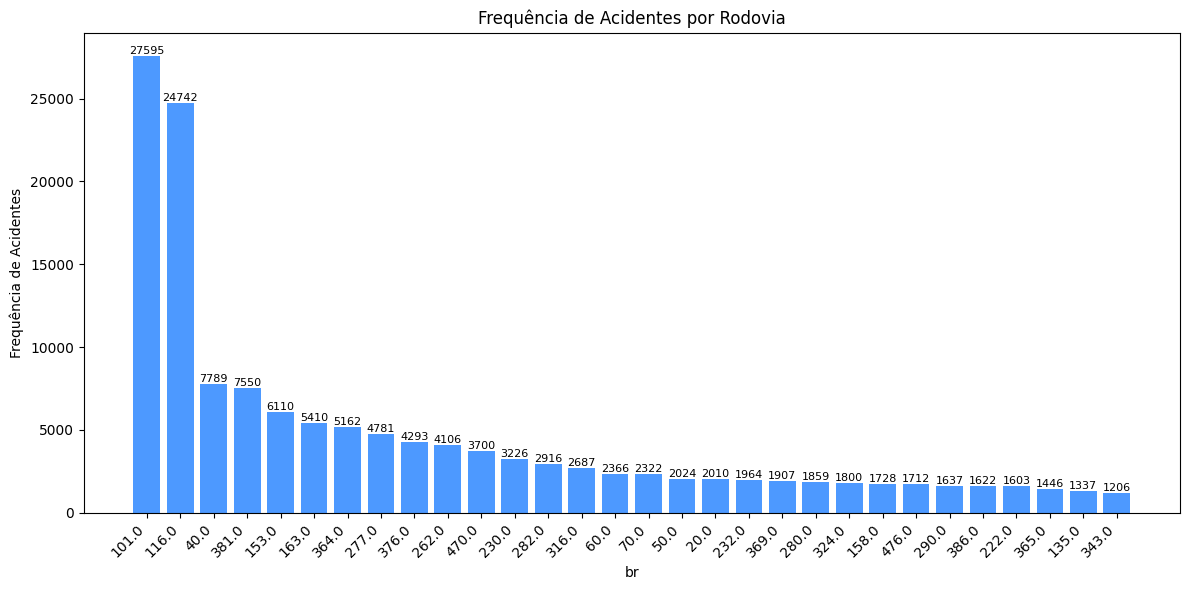

In [ ]:
frequencia_br = df_concat01['br'].value_counts()

# Número de rodovias a serem exibidas separadamente
top_br = 30

# Separando as top rodovias e as outras
top_br_data = frequencia_br.head(top_br)
outras_br_data = frequencia_br.iloc[top_br:].sum()

# Criando um novo DataFrame com as rodovias top e uma entrada para 'outras'
df_plot = pd.DataFrame({'br': top_br_data.index, 'frequencia': top_br_data.values})

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(df_plot['br'].astype(str), df_plot['frequencia'], color='#4D99FF',width=0.8)

# Adicione os valores acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=8)

plt.xlabel('br')
plt.ylabel('Frequência de Acidentes')
plt.title('Frequência de Acidentes por Rodovia')

# Ajuste o espaço entre os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.xticks(rotation=45, ha='right')  # Para rotacionar os rótulos do eixo x
plt.show()

A análise da frequência de acidentes por rodovias revela o seguinte:

*   **121 rodovias federais tem registros de acidentes** na base de dados registrados.

*   A rodovia com **acidentes mais frequentes é a BR 101** com 27.959 registros.






In [ ]:
# Tabela para visualizar a frequência e a porcentagem de acidentes por rodovia
# Calculando porcentagens e arredondando
total_acidentes = frequencia_br.sum()
df_plot['porcentagem'] = ((df_plot['frequencia'] / total_acidentes) * 100).round(1)

# Exibindo a tabela
tabela_rodovias = df_plot[['br', 'frequencia', 'porcentagem']]
print("Tabela de Frequência de Acidentes por Rodovia:")
print(tabela_rodovias)

Tabela de Frequência de Acidentes por Rodovia:
       br  frequencia  porcentagem
0   101.0       27595         17.1
1   116.0       24742         15.3
2    40.0        7789          4.8
3   381.0        7550          4.7
4   153.0        6110          3.8
5   163.0        5410          3.3
6   364.0        5162          3.2
7   277.0        4781          3.0
8   376.0        4293          2.7
9   262.0        4106          2.5
10  470.0        3700          2.3
11  230.0        3226          2.0
12  282.0        2916          1.8
13  316.0        2687          1.7
14   60.0        2366          1.5
15   70.0        2322          1.4
16   50.0        2024          1.3
17   20.0        2010          1.2
18  232.0        1964          1.2
19  369.0        1907          1.2
20  280.0        1859          1.2
21  324.0        1800          1.1
22  158.0        1728          1.1
23  476.0        1712          1.1
24  290.0        1637          1.0
25  386.0        1622          1.0
26  222.

*   As **BR-101 e Br-116 representam 34% dos acidentes** registrados em toda a base de dados.



### **4.3 - Avalie a gravidade dos acidentes (fatais, com feridos, sem vítimas).**

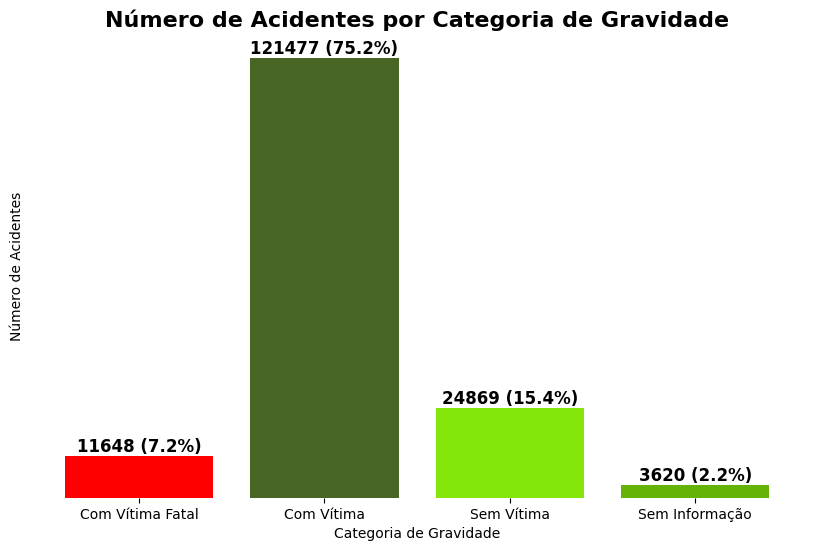

In [ ]:
# Crie as colunas para categorias de acidentes
df_concat01['acidente_com_vitima_fatal'] = df_concat01['mortos'] > 0
df_concat01['acidente_com_vitima'] = ((df_concat01['mortos'] == 0) & (df_concat01['feridos'] > 0))
df_concat01['acidente_sem_vitima'] = (df_concat01['mortos'] == 0) & (df_concat01['feridos'] == 0) & (df_concat01['ilesos'] > 0)
df_concat01['acidente_sem_informacao'] = (df_concat01['mortos'] == 0) & (df_concat01['feridos'] == 0) & (df_concat01['ilesos'] == 0) & (df_concat01['ignorados'] > 0)

# Calcule o número de acidentes em cada categoria
acidente_com_vitima_fatal = df_concat01['acidente_com_vitima_fatal'].sum()
acidente_com_vitima = df_concat01['acidente_com_vitima'].sum()
acidente_sem_vitima = df_concat01['acidente_sem_vitima'].sum()
acidente_sem_informacao = df_concat01['acidente_sem_informacao'].sum()
total_acidentes = df_concat01.shape[0]

# Crie um gráfico de barras
plt.figure(figsize=(10, 6))
categorias = ['Com Vítima Fatal', 'Com Vítima', 'Sem Vítima', 'Sem Informação']
quantidades = [acidente_com_vitima_fatal, acidente_com_vitima, acidente_sem_vitima, acidente_sem_informacao]

# Crie as barras
bars = plt.bar(categorias, quantidades, color=['red', '#486623', '#83E509', '#65B307'])

# Adicione os valores acima de cada barra
for bar, quantidade in zip(bars, quantidades):
    height = bar.get_height()
    plt.annotate(f'{quantidade} ({(quantidade/total_acidentes*100):.1f}%)',
                 (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# Remova as grades do gráfico
plt.grid(False)

# Remova as referências do eixo Y
plt.tick_params(axis='y', which='both', left=False, labelleft=False)

# Remova a borda do gráfico
plt.box(on=None)

plt.xlabel('Categoria de Gravidade')
plt.ylabel('Número de Acidentes')
plt.title('Número de Acidentes por Categoria de Gravidade', fontsize=16, fontweight='bold')

plt.show()


*   **Vitima fatal:** 7.2% dos acidentes, cerca de 11.648 cocorrências tiveram vítimas fatais.

*   **Com vítima:** 75.2% dos acidêntes tiveram vítimas, tanto com ferimentos leves quanto graves.

*   **Sem Vítima:** 15.4% foram acidentes sem vitimas.

*   Sem informação: 2.2% dos acidentes são desconhecidos.



## **5 - Identificação de Zonas de Alto Risco**

 Identificar quais as áreas com mais frequencia de acidentes e comparar com a atual localização dos radares.

In [ ]:
df_concat02 = df_concat01.copy()
df_radar02 = df_radar01.copy()

### **5.1 - Determinar áreas (por exemplo, segmentos de rodovias específicos) com alta frequência de acidentes graves.**

*   Agrupar os dados de acidentes por "br" (número da rodovia) e "km" (quilômetro da rodovia).

*   Calcular a frequência de acidentes por categoria: vítimas fatais, vítimas, sem vítimas e sem informação.

*   Mostrar as 10 principais entradas com os maiores valores, identificando as rodovias e quilômetros mais críticos em termos de acidentes graves.




In [ ]:
# Formatar valores da variável "br" para que fique igual ao valores da tabela de radares
df_concat02['br'] = df_concat02['br'].apply(lambda x: f'BR-{int(x):d}' if pd.notna(x) and not str(x).startswith('BR-') else x)

In [ ]:
# Criando uma variável que representa a rodovia e o km da rodovia
df_concat02['rodovia_km'] = df_concat02['br'].astype(str) + ', km-' + df_concat02['km'].astype(str)

In [ ]:
# Agrupando os acidentes por rodovia e km
acidentes_por_rodovia_km = df_concat02.groupby(['rodovia_km'])[
    ['acidente_com_vitima_fatal', 'acidente_com_vitima', 'acidente_sem_vitima', 'acidente_sem_informacao']].sum().reset_index()

In [ ]:
# Filtrando acidentes por KM das Rodovias ordenando por maior ocorrencia de vítimas fatais e vítimas.
acidentes_por_rodovia_km.sort_values(['acidente_com_vitima_fatal','acidente_com_vitima'], ascending = False).head(10)

,rodovia_km,acidente_com_vitima_fatal,acidente_com_vitima,acidente_sem_vitima,acidente_sem_informacao
1041,"101.0, km-85",11,131,29,4
1659,"116.0, km-188",11,32,5,2
345,"101.0, km-148",10,113,10,6
1705,"116.0, km-229",10,98,17,2
2116,"116.0, km-6",10,88,18,1
317,"101.0, km-122",10,65,14,2
1687,"116.0, km-212",10,58,10,0
915,"101.0, km-70",9,132,21,2
318,"101.0, km-123",9,91,9,1
1613,"116.0, km-146",9,90,13,1


*   **Rodovias e Quilômetros Críticos:** A Br-101 e Br-116 aparecem frequentemente nas 10 principais entradas, o que sugere que essas rodovias têm uma alta incidência de acidentes, tanto com vítimas fatais quanto com vítimas em geral. Os quilômetros exatos, como "km-85" e "km-188", também são indicativos de áreas específicas propensas a acidentes.

*   **Acidentes com Vítimas Fatais:**A BR-101 no Km-85 e a BR-116 no Km-188 são os locai com o maiores números de vítimas fatais, 11 no total.

*   **Acidentes com Vítimas:** A BR-101 tem dois trechos com um volume alto de acidentes com vítimas. No Km-85 e Km-70. Pela extensão da rodovia os trechos são próximos.

*   **Acidentes sem informação:** Pelos números baixos, sugere um bom registro de dados.






### **5.2 - Comparar a relação dos acidentes com a localização atual dos radares.**

Para esta análise, sera necessário envolver o cruzamento de informações sobre acidentes de trânsito em rodovias federais com dados de radares localizados nessas rodovias. Para isso, foram realizadas as etapas abaixo:

*   Criação de uma nova coluna 'rodovia_km_acidentes' no DataFrame df_concat02 e atualização da coluna 'rodovia_km' no DataFrame df_radar01. Ambas as colunas servem para identificar exclusivamente a localização de cada ponto (seja de acidente ou de radar) ao longo das rodovias, facilitando a comparação e a análise dos dados.

*   Agrupamento dos dados pelo identificador único de cada trecho representado pela combinação de rodovia e quilômetro com a contagem do número de radares em cada trecho de rodovia.

*   Seleção das principais rodovias e trechos, ordenando-os com base no número de acidentes com vítimas fatais e acidentes com vítimas. Essa análise nos permitirá identificar as áreas mais críticas que requerem atenção especial em termos de segurança viária e presença de radares.






In [ ]:
# Criar a coluna 'rodovia_km_acidentes'
df_concat02['rodovia_km_acidentes'] = df_concat02.apply(lambda row: f"{row['rodovia_km']}_{row['km']}", axis=1)

In [ ]:
# Atualizar a coluna 'rodovia_km'
df_radar02['rodovia_km'] = df_radar02.apply(lambda row: f"{row['rodovia']}_{row['km']}", axis=1)

In [ ]:
# Contando o número de radares em cada rodovia e quilômetro (rodovia_km) a partir do dataframe de radares:
radares_por_rodovia_km = df_radar02.groupby(['rodovia_km']).size().reset_index(name='quantidade_radares')

In [ ]:
# Mesclando os dados de acidentes e radares usando a coluna 'rodovia_km'
acidentes_radar_por_rodovia = pd.merge(acidentes_por_rodovia_km, radares_por_rodovia_km, on='rodovia_km', how='left')

In [ ]:
# Preenchendo os valores NaN (sem correspondência de radares) com 0:
acidentes_radar_por_rodovia['quantidade_radares'].fillna(0, inplace=True)

In [ ]:
# Selecionando as colunas desejadas
selec_colunas = ['rodovia_km', 'acidente_com_vitima_fatal', 'acidente_com_vitima', 'quantidade_radares']
rodovias= acidentes_radar_por_rodovia[selec_colunas].sort_values(['acidente_com_vitima_fatal', 'acidente_com_vitima'], ascending=False).head(10)
rodovias

,rodovia_km,acidente_com_vitima_fatal,acidente_com_vitima,quantidade_radares
1041,"101.0, km-85",11,131,0.0
1659,"116.0, km-188",11,32,0.0
345,"101.0, km-148",10,113,0.0
1705,"116.0, km-229",10,98,0.0
2116,"116.0, km-6",10,88,0.0
317,"101.0, km-122",10,65,0.0
1687,"116.0, km-212",10,58,0.0
915,"101.0, km-70",9,132,0.0
318,"101.0, km-123",9,91,0.0
1613,"116.0, km-146",9,90,0.0


*   A falta de radares nos trechos listados é grande. Isso mostra uma falta de fiscalização eletrónica na área, que pode contribuir com mais acidentes.



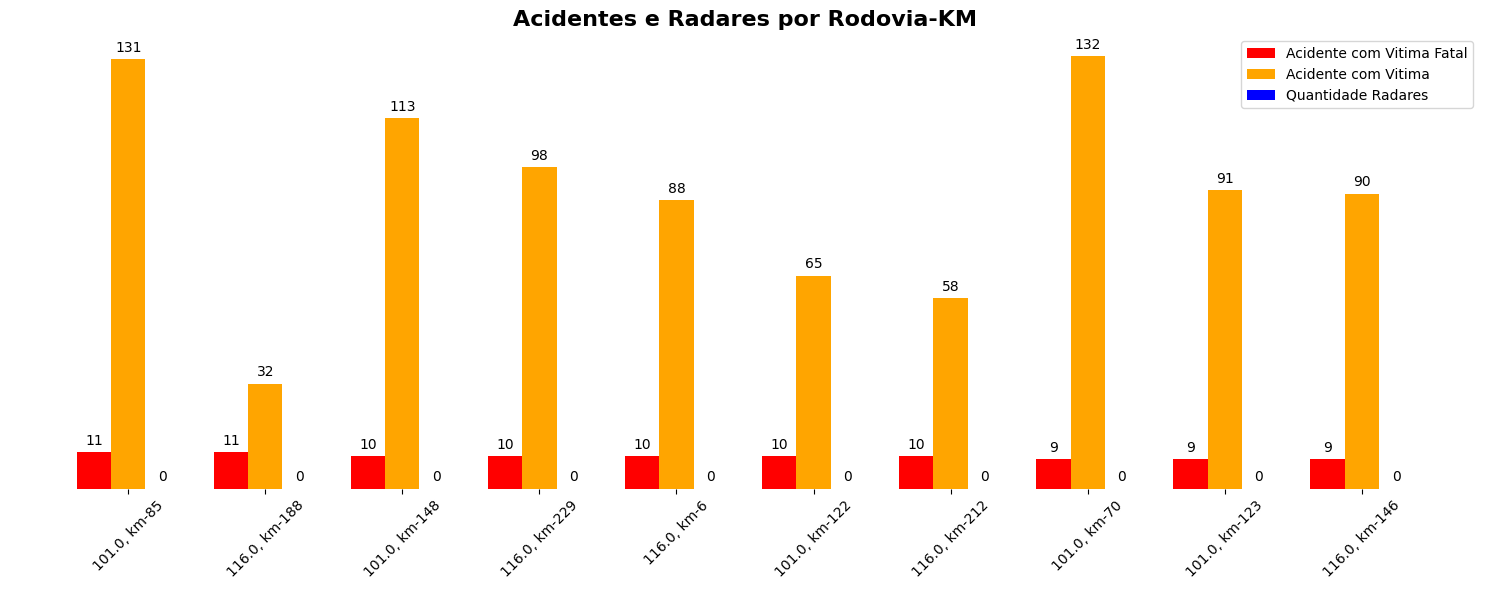

In [ ]:
rodovia_km = tuple(rodovias['rodovia_km'].to_list())
colors = ['red', 'orange', 'blue']
labels = ['Acidente com Vitima Fatal', 'Acidente com Vitima', 'Quantidade Radares']

data = {
    label: {
        'data': tuple(rodovias[column].to_list()),
        'color': color
    }
    for label, column, color in zip(labels, ['acidente_com_vitima_fatal', 'acidente_com_vitima', 'quantidade_radares'], colors)
}

x = range(len(rodovia_km))
width = 0.25

fig, ax = plt.subplots(figsize=(15, 6))

for i, (label, info) in enumerate(data.items()):
    rects = ax.bar([pos + i * width for pos in x], info['data'], width, label=label, color=info['color'])
    ax.bar_label(rects, padding=3)

ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Acidentes e Radares por Rodovia-KM', fontsize=16, fontweight='bold')
ax.set_xticks([pos + width for pos in x], rodovia_km)
ax.legend(loc='upper right')
plt.xticks(rotation=45)

plt.tight_layout()

*   **Rodovia com Maior Número de Acidentes e Sem Radares:** A rodovia BR-101, km-85, teve o maior número de acidentes com vítimas fatais (11) e acidentes com vítimas (131) na lista, mas aparentemente não possui radares.

*   **Necessidade de Fiscalização:** A ausência de radares em muitos trechos críticos destaca a necessidade de medidas de fiscalização e controle de velocidade nessas áreas para reduzir o número de acidentes com vítimas.

*   **Priorização de Instalação de Radares:** Os órgãos responsáveis pela segurança viária podem considerar a instalação de radares em trechos com alto índice de acidentes graves, como a BR-101 km-85, para melhorar a segurança nessas áreas.





## **6 - Análise de Proximidade:**

### **6.1 - Calcular a distância média dos acidentes até o radar mais próximo:**

Nesta análise, calculamos a distância média dos acidentes até o radar mais próximo. Seguimos os seguintes passos:

*   Coletamos as coordenadas geográficas dos acidentes e radares.

*   Usarei a biblioteca geopandas que permite o tratamento de dados geoespaciais, como latitude e longitude, e a realização de operações espaciais.

*   calcular a distância entre cada acidente e todos os radares utilizando a função distance() e em seguida a função min() para encontrar a distância mínima.

*   Visualizamos a distribuição das distâncias por meio de um histograma.




In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Convertendo os DataFrames para GeoDataFrames
gdf_radares = gpd.GeoDataFrame(df_radar02, geometry=gpd.points_from_xy(df_radar02.longitude, df_radar02.latitude))
gdf_acidentes = gpd.GeoDataFrame(df_concat02, geometry=gpd.points_from_xy(df_concat02.longitude, df_concat02.latitude))

# Calculando a distância mínima entre os acidentes e os radares mais próximos
def calcular_distancia_minima(x):
    return gdf_radares.distance(x).min()

# Criando a coluna 'distancia_radar_km' no DataFrame original
df_concat02['distancia_radar_km'] = gdf_acidentes.geometry.apply(calcular_distancia_minima)


In [ ]:
df_concat02['distancia_radar_km'].describe()

count    161614.000000
mean          1.889119
std           2.837767
min           0.000025
25%           0.074612
50%           0.461924
75%           2.281069
max          17.128776
Name: distancia_radar_km, dtype: float64

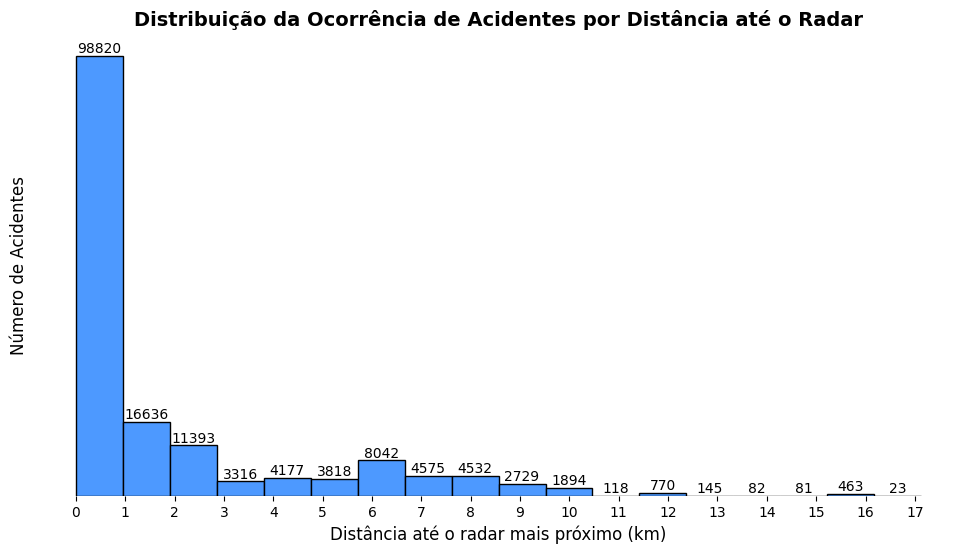

In [ ]:
# Definindo o número de bins (intervalos) no histograma
num_bins = 18

# Calculando os bins para o histograma
hist, bins = np.histogram(df_concat02['distancia_radar_km'], bins=num_bins)

# Calculando  a largura de cada bin
width = np.diff(bins)

# Calculando  o centro de cada bin
center = (bins[:-1] + bins[1:]) / 2

# Criando o histograma
fig, ax = plt.subplots(figsize=(12, 6))  # Ajuste as dimensões da figura
ax.bar(center, hist, align='center', width=width, color='#4D99FF', edgecolor='black')

# Adicionando rótulos e título ao gráfico
plt.xlabel('Distância até o radar mais próximo (km)', fontsize=12)
plt.ylabel('Número de Acidentes', fontsize=12)
plt.title('Distribuição da Ocorrência de Acidentes por Distância até o Radar', fontsize=14, fontweight='bold')

# Removendo as margens do gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Removendo a numeração do eixo y
plt.yticks([])

# Adicionando as quantidades de cada bin em cima das barras
for i in range(len(center)):
    if hist[i] > 0:
        ax.text(center[i], hist[i], str(int(hist[i])), ha='center', va='bottom', fontsize=10)

# Removendo as casas decimais dos valores no eixo X
plt.xticks(range(int(min(df_concat02['distancia_radar_km'])), int(max(df_concat02['distancia_radar_km']) + 1)), fontsize=10)

# Exibindo o histograma
plt.show()


Para compreender a relação entre a distância dos acidentes em relação aos radares, conduzimos uma análise que revelou insights como:

*   **Média de Distância:** Em média, os acidentes ocorrem a aproximadamente 1.88 km de distância de um radar. Isso indica que os acidentes geralmente ocorrem a uma distância moderada dos radares.

*   **Variação Considerável:** A dispersão das distâncias é notável, com acidentes variando desde muito próximos aos radares (0.000025 km) até distâncias consideráveis (máximo de 17.128776 km).

*   **Proximidade aos Radares:** 25% dos acidentes ocorrem a menos de 0.074 km de um radar, enquanto metade dos acidentes (50%) ocorre a menos de 0.461 km de um radar. A maioria dos acidentes (75%) acontece a menos de 2.281 km dos radares.

*   **Diminuição das Ocorrências:** À medida que as distâncias entre os acidentes e os radares aumentam, a quantidade de ocorrências tende a diminuir. Isso é evidente no histograma. 0 a 1km de distância ocorreram 98.820. De 1 a 2 km ocorreram 16.636, de 2 a 3 km de distância tiveram 11.393. E o intervalo de 16 a 17 km apenas 23 acidentes.




### **6.2 - Análise dos Tipos de Acidente Próximos ao Radar (0-1 km de distância)**


*   Aqui vou explorar os diferentes tipos de acidentes que ocorrem em uma proximidade de 0 a 1 km dos radares ao longo das rodovias. Utilizando os dados disponíveis, foi criado um gráfico de barras para visualizar a distribuição desses tipos de acidentes nessa faixa específica


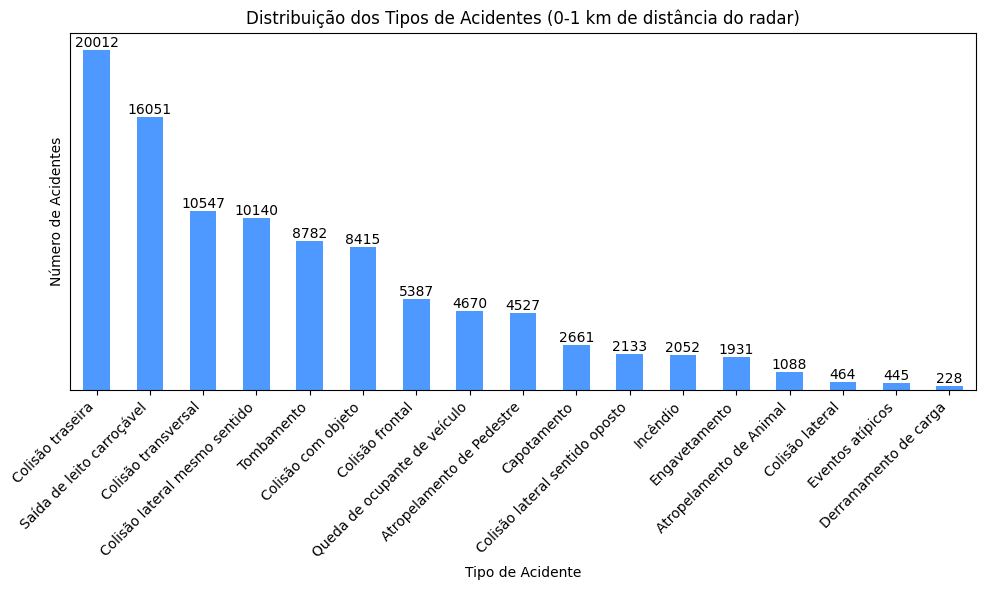

In [ ]:
# Filtrando os dados para a faixa de proximidade de 0 a 1 km
df_faixa_0_1_km = df_concat02[(df_concat02['distancia_radar_km'] >= 0) & (df_concat02['distancia_radar_km'] <= 1)]

# Contando a ocorrência de cada tipo de acidente
tipos_acidente = df_faixa_0_1_km['tipo_acidente'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
tipos_acidente.plot(kind='bar', color='#4D99FF')

# Adicionando rótulos e título ao gráfico
plt.xlabel('Tipo de Acidente')
plt.ylabel('Número de Acidentes')
plt.title('Distribuição dos Tipos de Acidentes (0-1 km de distância do radar)')

# Removendo a numeração do eixo y
plt.yticks([])

## Adicionando os valores em cima de cada barra
for index, value in enumerate(tipos_acidente):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


*   A alta incidência de colisões traseiras sugere a possibilidade de problemas relacionados à distância de segurança entre os veículos e a possibilidade de falta de sinalização para alertar sobre a presença desses equipamentos.

*   A presença significativa de saídas de leito carroçável pode indicar possíveis problemas na qualidade das estradas, como falta de sinalização adequada, curvas perigosas ou condições adversas da superfície da estrada.



## **7 - Comparação Anual de Acidentes**

A ideia é apresetar a evolução dos incidentes nos anos de 2021, 2022 e 2023, enfatizando acidentes com vítimas e vitimas fatais. Isso permite compreender melhor a distribuição temporal dos acidentes e identificar possíveis tendências ou variações ao longo do tempo.

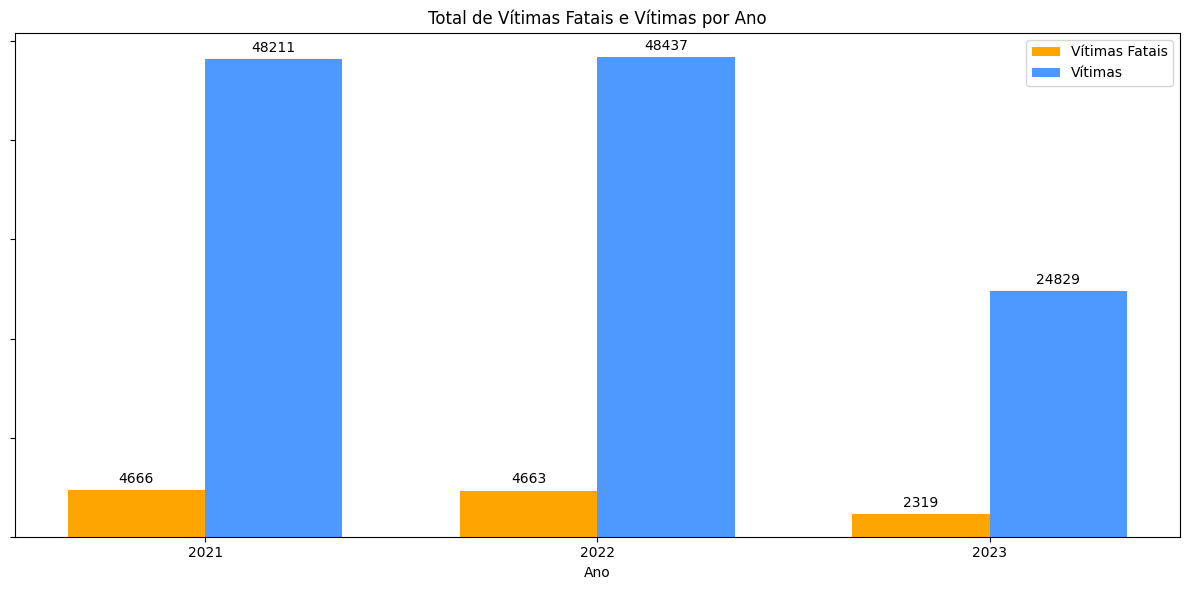

In [ ]:
# Filtrando os dados para cada ano
df_2021 = df_concat02[df_concat02['data_inversa'].dt.year == 2021]
df_2022 = df_concat02[df_concat02['data_inversa'].dt.year == 2022]
df_2023 = df_concat02[df_concat02['data_inversa'].dt.year == 2023]

# Agrupando os dados por mês e calculando a soma de acidentes com vítimas fatais e vítimas em cada mês
acidentes_2021 = df_2021.groupby(df_2021['data_inversa'].dt.month)[['acidente_com_vitima', 'acidente_com_vitima_fatal']].sum()
acidentes_2022 = df_2022.groupby(df_2022['data_inversa'].dt.month)[['acidente_com_vitima', 'acidente_com_vitima_fatal']].sum()
acidentes_2023 = df_2023.groupby(df_2023['data_inversa'].dt.month)[['acidente_com_vitima', 'acidente_com_vitima_fatal']].sum()

# Dados
total_2021_fatais = acidentes_2021['acidente_com_vitima_fatal'].sum()
total_2021_vitimas = acidentes_2021['acidente_com_vitima'].sum()
total_2022_fatais = acidentes_2022['acidente_com_vitima_fatal'].sum()
total_2022_vitimas = acidentes_2022['acidente_com_vitima'].sum()
total_2023_fatais = acidentes_2023['acidente_com_vitima_fatal'].sum()
total_2023_vitimas = acidentes_2023['acidente_com_vitima'].sum()

# Criando os dados para o gráfico
anos = ['2021', '2022', '2023']
vitimas_fatais = [total_2021_fatais, total_2022_fatais, total_2023_fatais]
vitimas = [total_2021_vitimas, total_2022_vitimas, total_2023_vitimas]

# Criando a figura e os eixos para os subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Criando as barras lado a lado
bar_width = 0.35
index = range(len(anos))

bar1 = ax.bar(index, vitimas_fatais, bar_width, label='Vítimas Fatais', color='orange')
bar2 = ax.bar([i + bar_width for i in index], vitimas, bar_width, label='Vítimas', color='#4D99FF')

# Removendo os rótulos do eixo y
ax.set_yticklabels([])

# Adicionando rótulos nas barras
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adicionando legendas, título e rótulos nos eixos
ax.set_xlabel('Ano')
ax.set_title('Total de Vítimas Fatais e Vítimas por Ano')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(anos)
ax.legend()

plt.tight_layout()
plt.show()


*   **Acidentes com vitimas:** Não houve uma queda dos acidentes com vítimas se comparar os anos de 2021, 2022 e meados de 2023. O que apresenta é uma estabilidade em relação ao número de acidentes.

*   Teve um aumento do número total de acidentes com vítimas no ano de 2022.

*   **Acidentes fatais:** Teve uma pequena queda do número de mortos.

*   Esses dados mostram que é necessário tomar providências urgentes para reduzir o número de acidentes.  





## **8 - Conclusão e Recomendações**

Após analisar os dados da PRF, entre os anos de 2021, 2022 até Julho de 2023, percebe-se uma necessidade de melhoria na parte de insfraestrutura e ações educacionais para que essa realidade mude.

Ao longo do tempo, teve uma estabilidade em relação ao número de acidentes, sem uma diminuição significativa.

**Recomendações:**

*   **Instalação de Radares em Trechos Críticos:** Priorizar a instalação de radares em trechos com alta incidência de acidentes graves como na BR-101 , km-85 e BR-116 , km-188 que tiveram 11 acidentes fatais em cada uma.

*   **Direcionamento de Recursos em Rodovias Frequentes:** A BR-101 e BR-116 tem a maioria dos acidentes graves. Considerar a instalação de radares em trechos específicos para reduzir a gravidade dos acidentes.

*   **Policiamento nas Estradas:** Reforçar o policiamento de trânsito em áreas de alto risco para garantir o cumprimento das leis de trânsito e promover um ambiente seguro.

*   **Sinalização Eficiente:**  Investir em sinalização de trânsito eficaz, incluindo placas de advertência, limites de velocidade e sinalização de curvas perigosas, para manter os motoristas informados.

*   **Campanhas Educativas de Conscientização:** Criar e veicular campanhas que visem educar e conscientizar os motoristas sobre comportamentos seguros no trânsito.

Essas medidas de segurança visam reduzir os acidentes e a melhorar o controle da velocidade nas estradas. Consequentemente, com a redução de acidentes graves, os recursos de resgates e hospitalares nas regiões dos acidentes irão diminuir também.

